In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Loading and Understanding (HAR Dataset)

In [2]:
import pandas as pd
import numpy as np

# Visualization (will be useful later)
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)

In [ ]:
train_path = "train.csv"
test_path = "test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (7352, 563)
Test shape: (2947, 563)


In [4]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,...,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,...,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,...,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,...,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,...,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,...,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
train_df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)', 'angle(tBodyGyroMean,gravityMean)', 'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)', 'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'], dtype='object', length=563)

In [6]:
train_df['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [8]:
activity_mapping = {
    'WALKING': 0,
    'WALKING_UPSTAIRS': 1,
    'WALKING_DOWNSTAIRS': 2,
    'SITTING': 3,
    'STANDING': 4,
    'LAYING': 5
}

train_df['Activity_Label'] = train_df['Activity'].map(activity_mapping)
test_df['Activity_Label'] = test_df['Activity'].map(activity_mapping)

train_df[['Activity', 'Activity_Label']]

,Activity,Activity_Label
0,STANDING,4
1,STANDING,4
2,STANDING,4
3,STANDING,4
4,STANDING,4
...,...,...
7347,WALKING_UPSTAIRS,1
7348,WALKING_UPSTAIRS,1
7349,WALKING_UPSTAIRS,1
7350,WALKING_UPSTAIRS,1


In [10]:
print("Missing values in training data:", train_df.isnull().sum().sum())
print("Missing values in test data:", test_df.isnull().sum().sum())

Missing values in training data: 0
Missing values in test data: 0


In [11]:
train_df.dtypes.value_counts()

float64    561
int64        2
object       1
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="deep")

# Make a copy to avoid modifying original
df = train_df.copy()

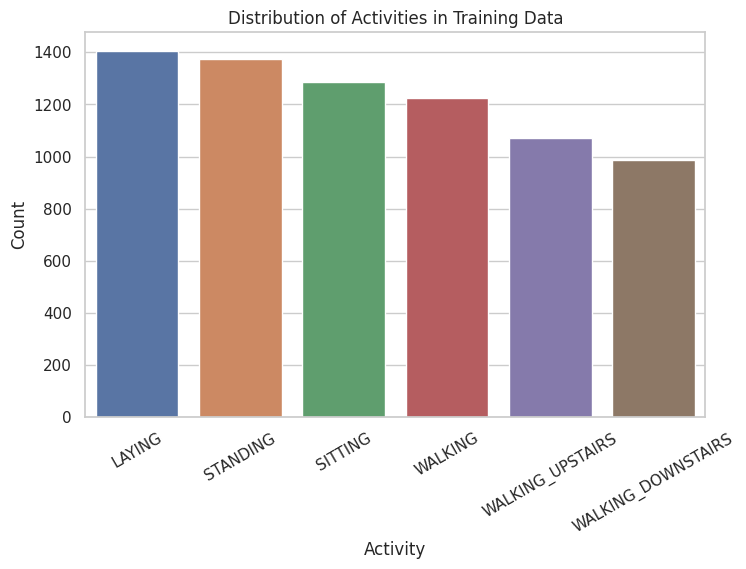

In [14]:
# Class Distribution

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Activity', order=df['Activity'].value_counts().index)
plt.xticks(rotation=30)
plt.title("Distribution of Activities in Training Data")
plt.xlabel("Activity")
plt.ylabel("Count")
plt.show()


We are selecting 10 meaningful features

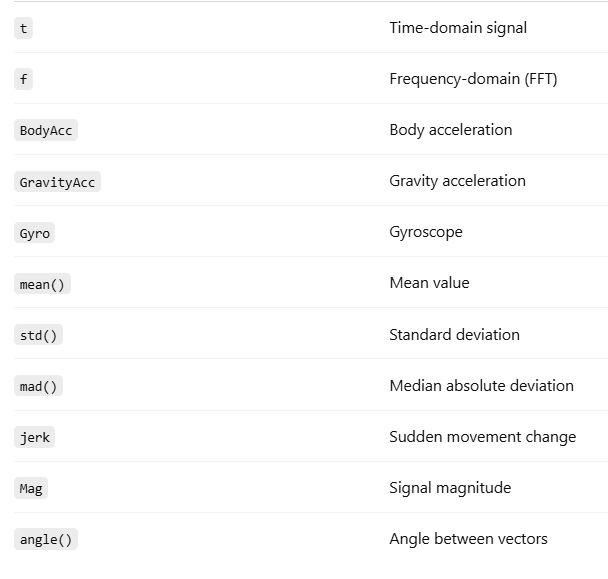

In [18]:
selected_features = [
    'tBodyAcc-mean()-X',
    'tBodyAcc-mean()-Y',
    'tBodyAcc-mean()-Z',
    'tBodyAcc-std()-X',
    'tBodyAcc-std()-Y',
    'tBodyAcc-std()-Z',
    'tBodyGyro-mean()-X',
    'tBodyGyro-std()-X',
    'fBodyAcc-mean()-X',
    'fBodyAcc-std()-X'
]

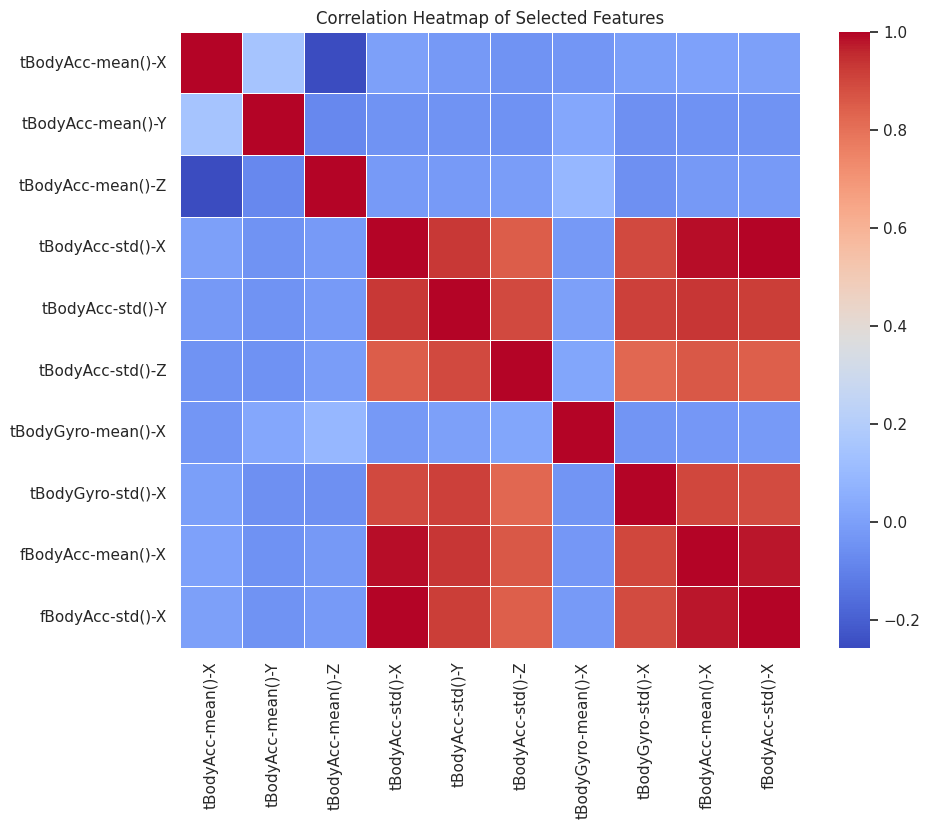

In [19]:
# Correlation Heatmap

plt.figure(figsize=(10,8))
corr_matrix = df[selected_features].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

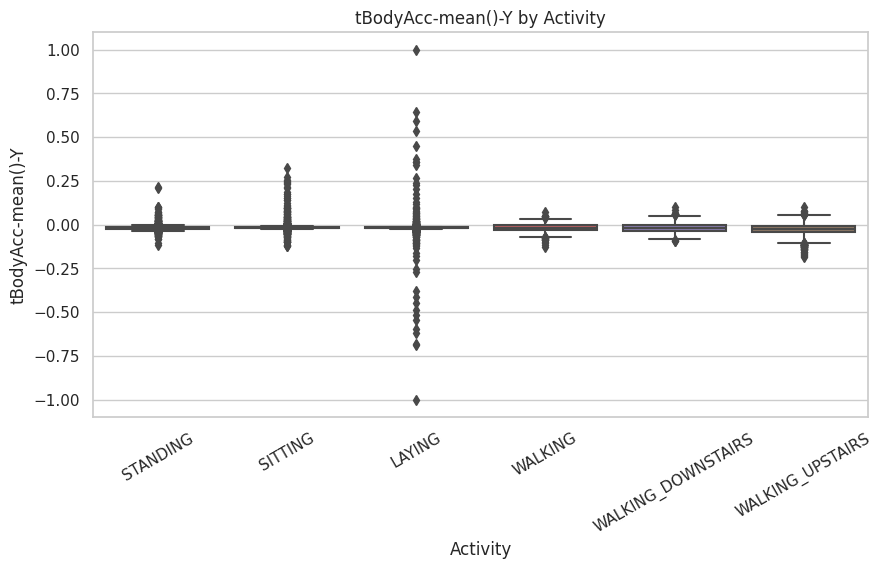

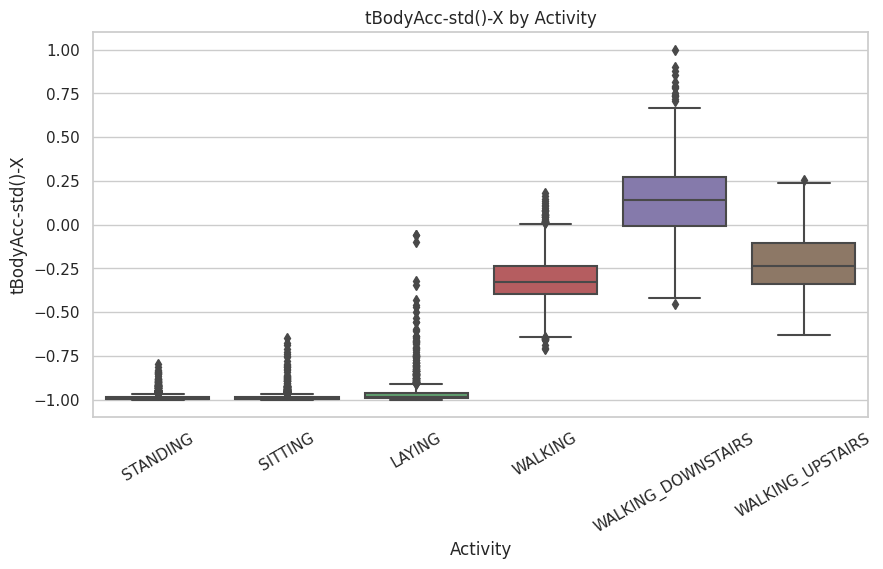

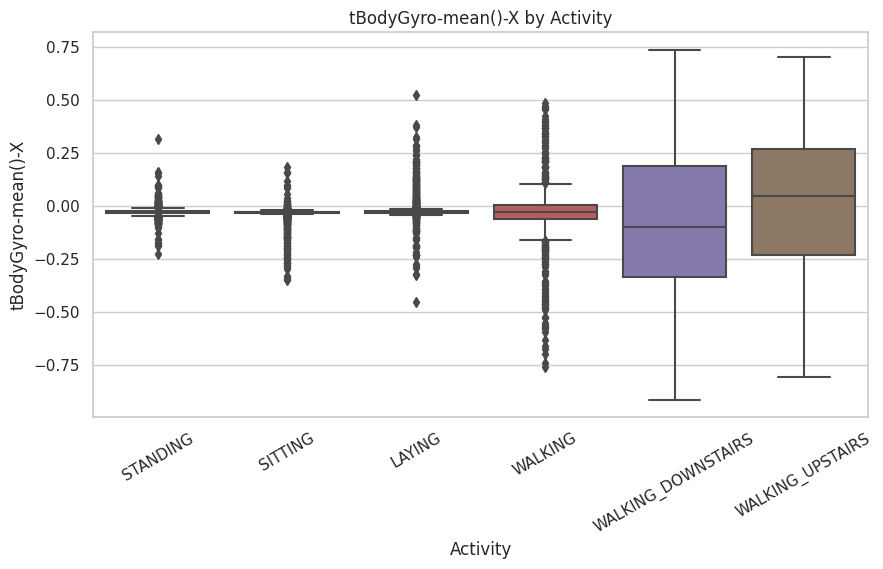

In [22]:
features_to_plot = [
    'tBodyAcc-mean()-Y',
    'tBodyAcc-std()-X',
    'tBodyGyro-mean()-X'
]

for feature in features_to_plot:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x='Activity', y=feature)
    plt.xticks(rotation=30)
    plt.title(f"{feature} by Activity")
    plt.show()

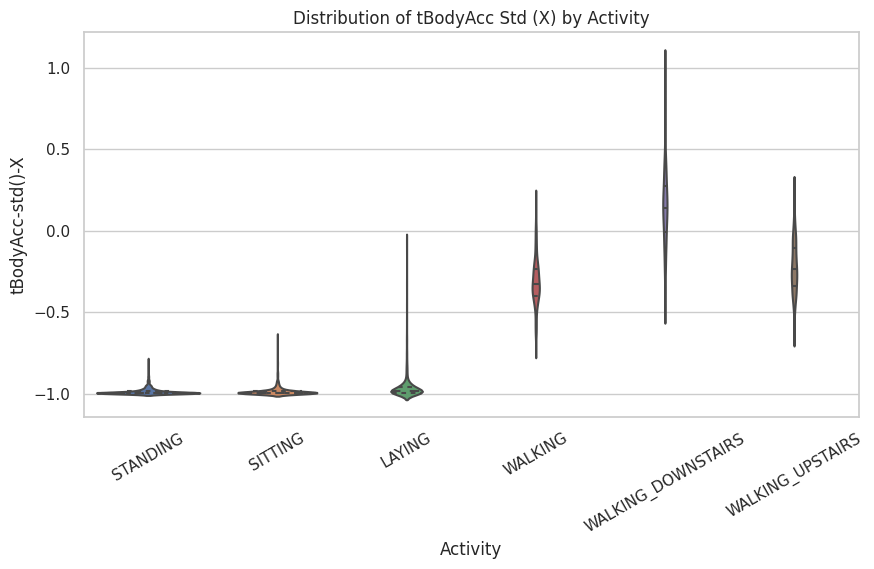

In [23]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='Activity', y='tBodyAcc-std()-X', inner='quartile')
plt.xticks(rotation=30)
plt.title("Distribution of tBodyAcc Std (X) by Activity")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

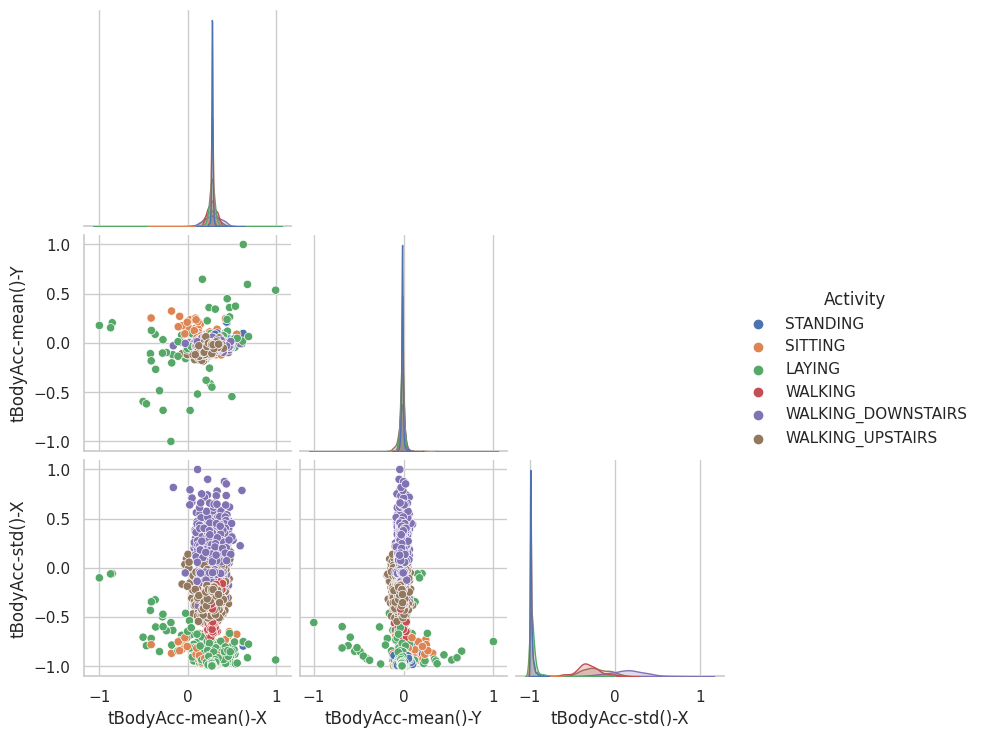

In [24]:
pairplot_features = [
    'tBodyAcc-mean()-X',
    'tBodyAcc-mean()-Y',
    'tBodyAcc-std()-X',
    'Activity'
]

sns.pairplot(df[pairplot_features], hue='Activity', corner=True)
plt.show()

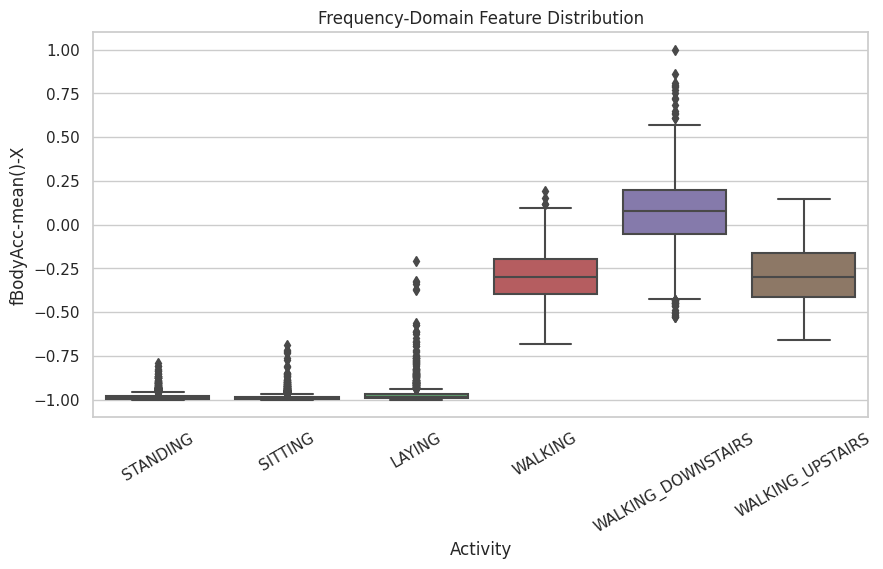

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Activity', y='fBodyAcc-mean()-X')
plt.xticks(rotation=30)
plt.title("Frequency-Domain Feature Distribution")
plt.show()

# Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [28]:
X_train = train_df.drop(columns=['Activity', 'Activity_Label', 'subject'])
y_train = train_df['Activity_Label']

X_test = test_df.drop(columns=['Activity', 'Activity_Label', 'subject'])
y_test = test_df['Activity_Label']

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test :", X_test.shape)
print("y_test :", y_test.shape)

X_train: (7352, 561)
y_train: (7352,)
X_test : (2947, 561)
y_test : (2947,)


In [29]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling

### Logistic Regression

In [30]:
log_reg = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial',
    n_jobs=-1
)

log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

lr_acc = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_acc)

Logistic Regression Accuracy: 0.9552086868001357


In [31]:
print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       496
           1       0.96      0.95      0.96       471
           2       0.99      0.94      0.97       420
           3       0.97      0.87      0.92       491
           4       0.89      0.97      0.93       532
           5       1.00      0.99      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.95      0.96      2947
weighted avg       0.96      0.96      0.96      2947



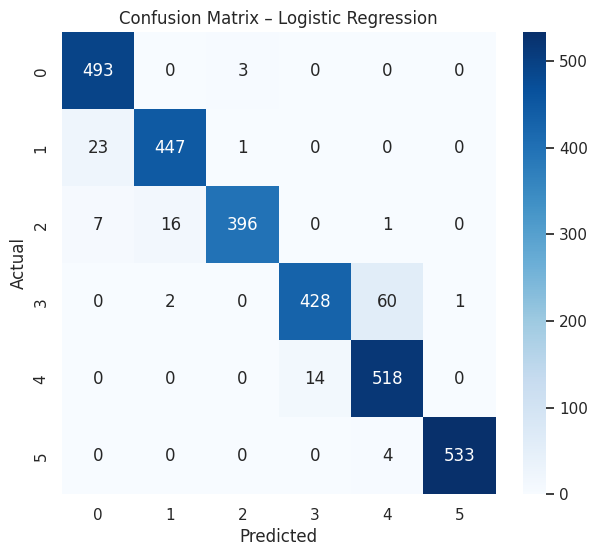

In [32]:
plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), 
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Random Forest Classifier

In [33]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)   # NOTE: unscaled data

y_pred_rf = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.9287410926365796


In [34]:
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       496
           1       0.89      0.92      0.91       471
           2       0.97      0.86      0.91       420
           3       0.91      0.88      0.90       491
           4       0.90      0.92      0.91       532
           5       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947



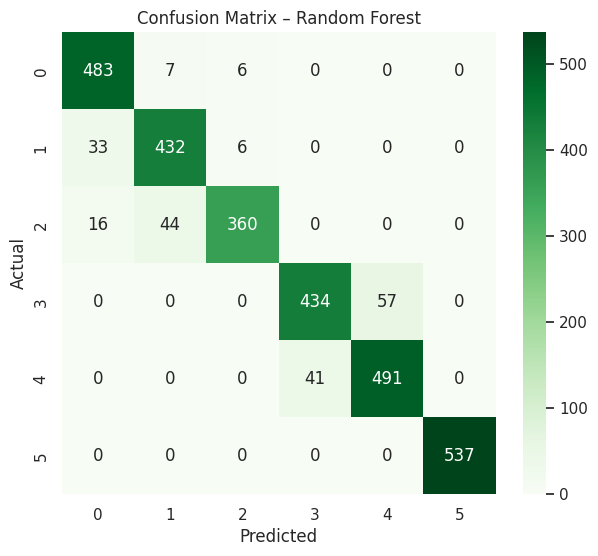

In [35]:
plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [36]:
baseline_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [lr_acc, rf_acc]
})

baseline_results

,Model,Accuracy
0,Logistic Regression,0.955209
1,Random Forest,0.928741


### Gradient Boosting Classifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [39]:
y_pred_gb = gb_model.predict(X_test)

gb_acc = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_acc)

Gradient Boosting Accuracy: 0.9399389209365456


In [40]:
print("Gradient Boosting Classification Report:\n")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       496
           1       0.93      0.95      0.94       471
           2       0.98      0.92      0.95       420
           3       0.92      0.85      0.89       491
           4       0.87      0.93      0.90       532
           5       1.00      1.00      1.00       537

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



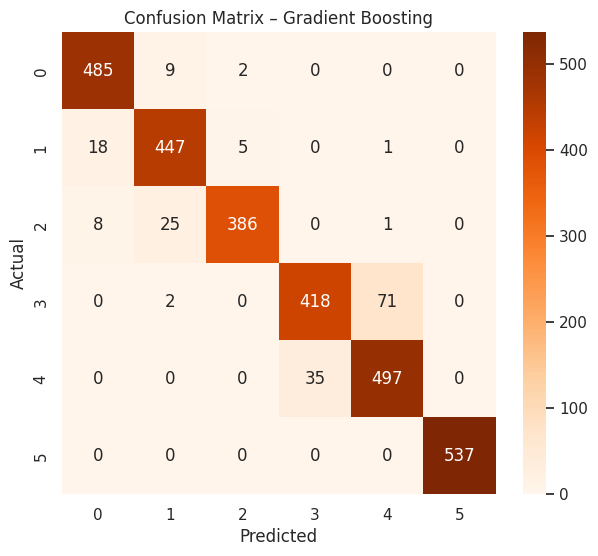

In [41]:
plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb),
            annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix – Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

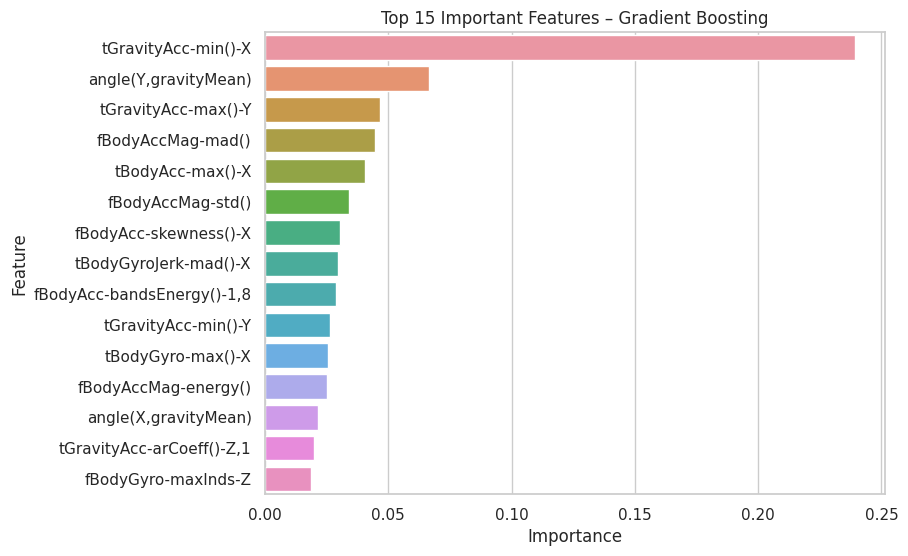

In [42]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
})

top_features = feature_importance.sort_values(by='Importance', ascending=False).head(15)
top_features


plt.figure(figsize=(8,6))
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title("Top 15 Important Features – Gradient Boosting")
plt.show()

### Support Vector Machine

In [43]:
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle

In [44]:
# Shuffle before sampling
X_train_svm, y_train_svm = shuffle(X_train_scaled, y_train, random_state=42)

# Use 50% of training data
subset_size = int(0.5 * X_train_svm.shape[0])
X_train_svm = X_train_svm[:subset_size]
y_train_svm = y_train_svm[:subset_size]

print("SVM Training Samples:", X_train_svm.shape[0])

SVM Training Samples: 3676


In [45]:
svm_model = LinearSVC(
    C=1.0,
    max_iter=5000,
    random_state=42
)

svm_model.fit(X_train_svm, y_train_svm)


y_pred_svm = svm_model.predict(X_test_scaled)

svm_acc = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_acc)

SVM Accuracy: 0.9497794367153037


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [46]:
print("SVM Classification Report:\n")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       496
           1       0.98      0.95      0.97       471
           2       0.99      0.97      0.98       420
           3       0.94      0.88      0.91       491
           4       0.85      0.96      0.90       532
           5       1.00      0.95      0.97       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



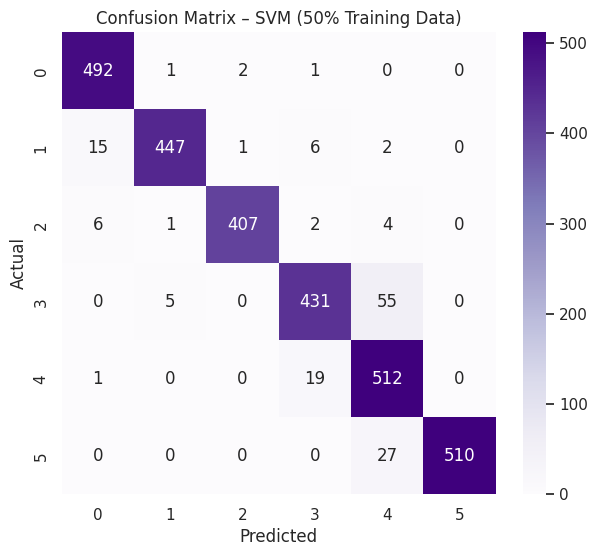

In [47]:
plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm),
            annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix – SVM (50% Training Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [48]:
model_comparison = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'Gradient Boosting',
        'SVM (50% train)'
    ],
    'Accuracy': [
        lr_acc,
        rf_acc,
        gb_acc,
        svm_acc
    ]
})

model_comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,0.955209
3,SVM (50% train),0.949779
2,Gradient Boosting,0.939939
1,Random Forest,0.928741


### Neural Network (MLP Classifier)

In [49]:
from sklearn.neural_network import MLPClassifier

In [50]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=64,
    learning_rate='adaptive',
    max_iter=50,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42
)

mlp_model.fit(X_train_scaled, y_train)

MLPClassifier(batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 64),
              learning_rate='adaptive', max_iter=50, random_state=42)

In [51]:
y_pred_mlp = mlp_model.predict(X_test_scaled)

mlp_acc = accuracy_score(y_test, y_pred_mlp)
print("MLP Neural Network Accuracy:", mlp_acc)

MLP Neural Network Accuracy: 0.9477434679334917


In [52]:
print("MLP Classification Report:\n")
print(classification_report(y_test, y_pred_mlp))

MLP Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       496
           1       0.94      0.97      0.96       471
           2       0.97      0.93      0.95       420
           3       0.93      0.89      0.91       491
           4       0.89      0.94      0.91       532
           5       1.00      0.98      0.99       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



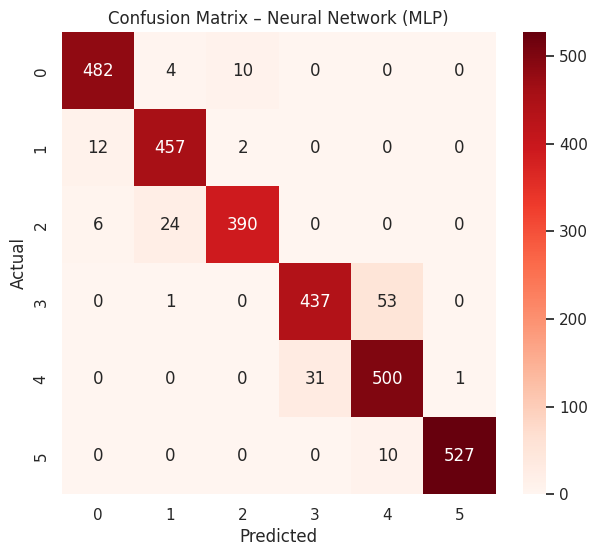

In [53]:
plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, y_pred_mlp),
            annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix – Neural Network (MLP)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

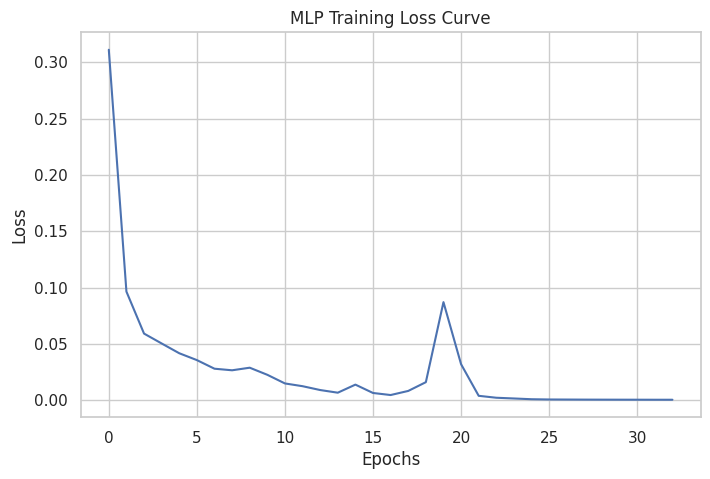

In [54]:
plt.figure(figsize=(8,5))
plt.plot(mlp_model.loss_curve_)
plt.title("MLP Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [55]:
final_results = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'Gradient Boosting',
        'SVM (50% train)',
        'Neural Network (MLP)'
    ],
    'Accuracy': [
        lr_acc,
        rf_acc,
        gb_acc,
        svm_acc,
        mlp_acc
    ]
})

final_results.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,0.955209
3,SVM (50% train),0.949779
4,Neural Network (MLP),0.947743
2,Gradient Boosting,0.939939
1,Random Forest,0.928741


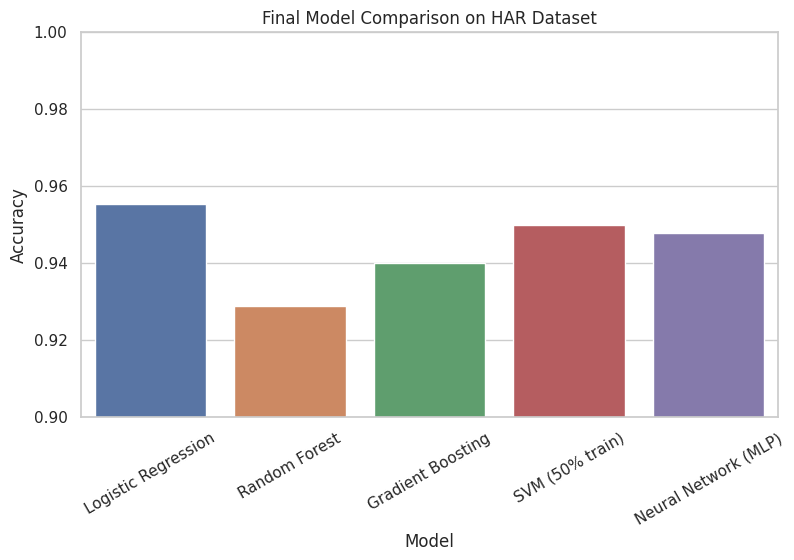

In [56]:
plt.figure(figsize=(9,5))
sns.barplot(
    data=final_results,
    x='Model',
    y='Accuracy'
)

plt.xticks(rotation=30)
plt.ylim(0.9, 1.0)
plt.title("Final Model Comparison on HAR Dataset")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [59]:
evaluation_results = []

models = {
    "Logistic Regression": (y_test, y_pred_lr),
    "Random Forest": (y_test, y_pred_rf),
    "Gradient Boosting": (y_test, y_pred_gb),
    "SVM (50% train)": (y_test, y_pred_svm),
    "Neural Network (MLP)": (y_test, y_pred_mlp)
}

for model_name, (y_true, y_pred) in models.items():
    evaluation_results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision (Macro)": precision_score(y_true, y_pred, average='macro'),
        "Recall (Macro)": recall_score(y_true, y_pred, average='macro'),
        "F1-score (Macro)": f1_score(y_true, y_pred, average='macro')
    })

evaluation_df = pd.DataFrame(evaluation_results)
evaluation_df.sort_values(by="F1-score (Macro)", ascending=False)

,Model,Accuracy,Precision (Macro),Recall (Macro),F1-score (Macro)
0,Logistic Regression,0.955209,0.958148,0.953963,0.955091
3,SVM (50% train),0.949779,0.954466,0.949992,0.951273
4,Neural Network (MLP),0.947743,0.949074,0.946978,0.947687
2,Gradient Boosting,0.939939,0.941907,0.938575,0.939587
1,Random Forest,0.928741,0.929953,0.925829,0.927042


# Model Performance Summary

The comparative evaluation shows that Logistic Regression achieved the best overall performance, obtaining the highest accuracy (95.52%) and macro F1-score (0.955). This indicates that the engineered HAR features are highly discriminative and largely linearly separable.

The SVM (trained on 50% of the data) performed competitively, with a macro F1-score of 0.951, demonstrating strong generalization despite reduced training data, though with higher computational cost.

The Neural Network (MLP) achieved comparable performance (macro F1 = 0.948), confirming that deep learning can effectively model non-linear relationships in the feature space; however, its performance did not surpass simpler linear models.

Gradient Boosting and Random Forest showed slightly lower performance, suggesting that for this dataset, complex ensemble methods did not provide significant gains over linear classification.

Overall, the results indicate that model selection based solely on complexity is not optimal, and that simpler models such as Logistic Regression can outperform more advanced methods when high-quality, well-engineered features are available.